<a href="https://colab.research.google.com/github/taka7peace/portfolio_7/blob/main/election_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

"In districts with a higher proportion of males, there is a higher rate of approval. Similarly, in districts where there is a higher proportion of individuals in their 30s to 50s, the approval rate is higher.

Objective Clarification (Setting the dependent variable)

Objective: To extract potential factor candidates with solid evidence for the highs and lows of the approval rate

Dependent variable: Approval rate

Independent variables: Features that can be potential factor candidates
With this in mind, I plan to proceed with the analysis.since I want to extract the factors of the district where the approval rate has changed significantly compared to the last time, I will group the outliers with the dependent variable as this time's approval rate and the independent variable as the previous approval rate.

##Feature Selection
(Selection of independent variables)

This time, it was a bit peculiar that only people in their 20s are reversing the trend, so considering the presence or absence of this effect,

Feature 1 'Proportion over 60' (not considering the reversal phenomenon of people in their 20s)

Feature 2 'Proportion of 30-50s' (considering the reversal phenomenon of people in their 20s)

Feature 3 'Male Ratio'

Feature 4 'Time required from the station where the main government building is located to the old district center station' I live in a district different from where the main government building is located, but I felt a little sense of insecurity that 'my living area may be left out from the development' (domain knowledge).

Feature 5 'Average Household Size'

Feature 6 'Average Annual Income per Person'

##Data Collection and Cleansing
'1. Proportion over 60' 

'2. Proportion of 30-50s'
'3. Male Ratio'

Data acquisition method: Download the 2020 age and gender-specific estimated population from the Osaka City HP
Cleansing Method: Calculate the proportion of the target age group and the male ratio for the entire population and create a field for each district.

'4. Time to the main government building'

Data acquisition and cleansing method: Calculate the average required time from the old district center station to the nearest station of the new ward office at 8, 12, 15, and 18 on Saturday.

'5. Average Household Size'

Data acquisition method: Download the number of people per household in 2020 from the Osaka City HP
Cleansing Method: Create a field for each district

'6. Average income per person'

Data acquisition method: Download income class data by household from the Osaka City HP
Analysis and visualization of results
Cleansing Method: Calculate the average annual household income by multiplying the average annual income and proportion for each class, and divide by the average household size obtained in 5.

In [1]:
pip install seaborn-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [2]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn-analyzer 0.2.13 requires seaborn>=0.11.0, but you have seaborn 0.9.0 which is incompatible.


In [4]:
#%%読込
import pandas as pd
from seaborn_analyzer import CustomPairPlot
import seaborn as sns

#パラメータ最適化の手法(Grid, Random, Bayes, Optuna)
PARAM_TUNING_METHOD = 'Optuna'
#乱数シード
SEED = 47

#使用するフィールド
KEY_VALUE = 'ward_before'#キー列
OBJECTIVE_VARIALBLE = 'approval_rate'#目的変数
EXPLANATORY_VALIABLES = ['1_over60','2_between_30to60','3_male_ratio','4_required_time','5_household_member','6_income']#説明変数
USE_EXPLANATORY = ['2_between_30to60','3_male_ratio','5_household_member','latitude']#使用する説明変数
#データ読込
df = pd.read_csv(f'./osaka_metropolis_english.csv')
df

,ward_before,approved,opposed,approval_rate,ward_after,approval_former,1_over60,2_between_30to60,3_male_ratio,4_required_time,5_household_member,6_income,latitude,ward_office,new_tennoji
0,Kita,38207,29689,0.562728,Kita,0.590,0.230517,0.499141,0.485807,4.00,1.83,234.590164,42.325,1,0
1,Miyakojima,29758,26805,0.526104,Kita,0.530,0.307543,0.425080,0.481006,9.25,2.10,208.880952,42.078,0,0
2,Hukushima,22017,19007,0.536686,Kita,0.556,0.237408,0.467986,0.473394,10.75,2.06,223.325243,41.535,0,0
3,Higashinari,20771,21102,0.496048,Kita,0.500,0.307140,0.411267,0.473798,19.25,2.20,187.295455,40.197,0,0
4,Asahi,23123,25894,0.471734,Kita,0.452,0.357208,0.390663,0.473722,19.00,2.16,199.513889,43.273,0,0
5,Joto,46976,46121,0.504592,Kita,0.505,0.308567,0.419868,0.474112,21.75,2.25,187.822222,42.190,0,0
6,Tsurumi,29842,28555,0.511019,Kita,0.501,0.278914,0.422815,0.475847,24.00,2.52,175.952381,42.257,0,0
7,Nishinari,22372,23021,0.492851,Chuo,0.468,0.465980,0.342897,0.577474,13.00,1.75,147.142857,38.090,0,0
8,Chuo,24766,23814,0.509798,Chuo,0.541,0.203692,0.506583,0.468446,8.25,1.65,250.181818,40.870,1,0
9,Nishi,26824,23026,0.538094,Chuo,0.577,0.195380,0.496780,0.467432,7.25,1.96,224.413265,40.575,0,0


<Figure size 640x480 with 0 Axes>

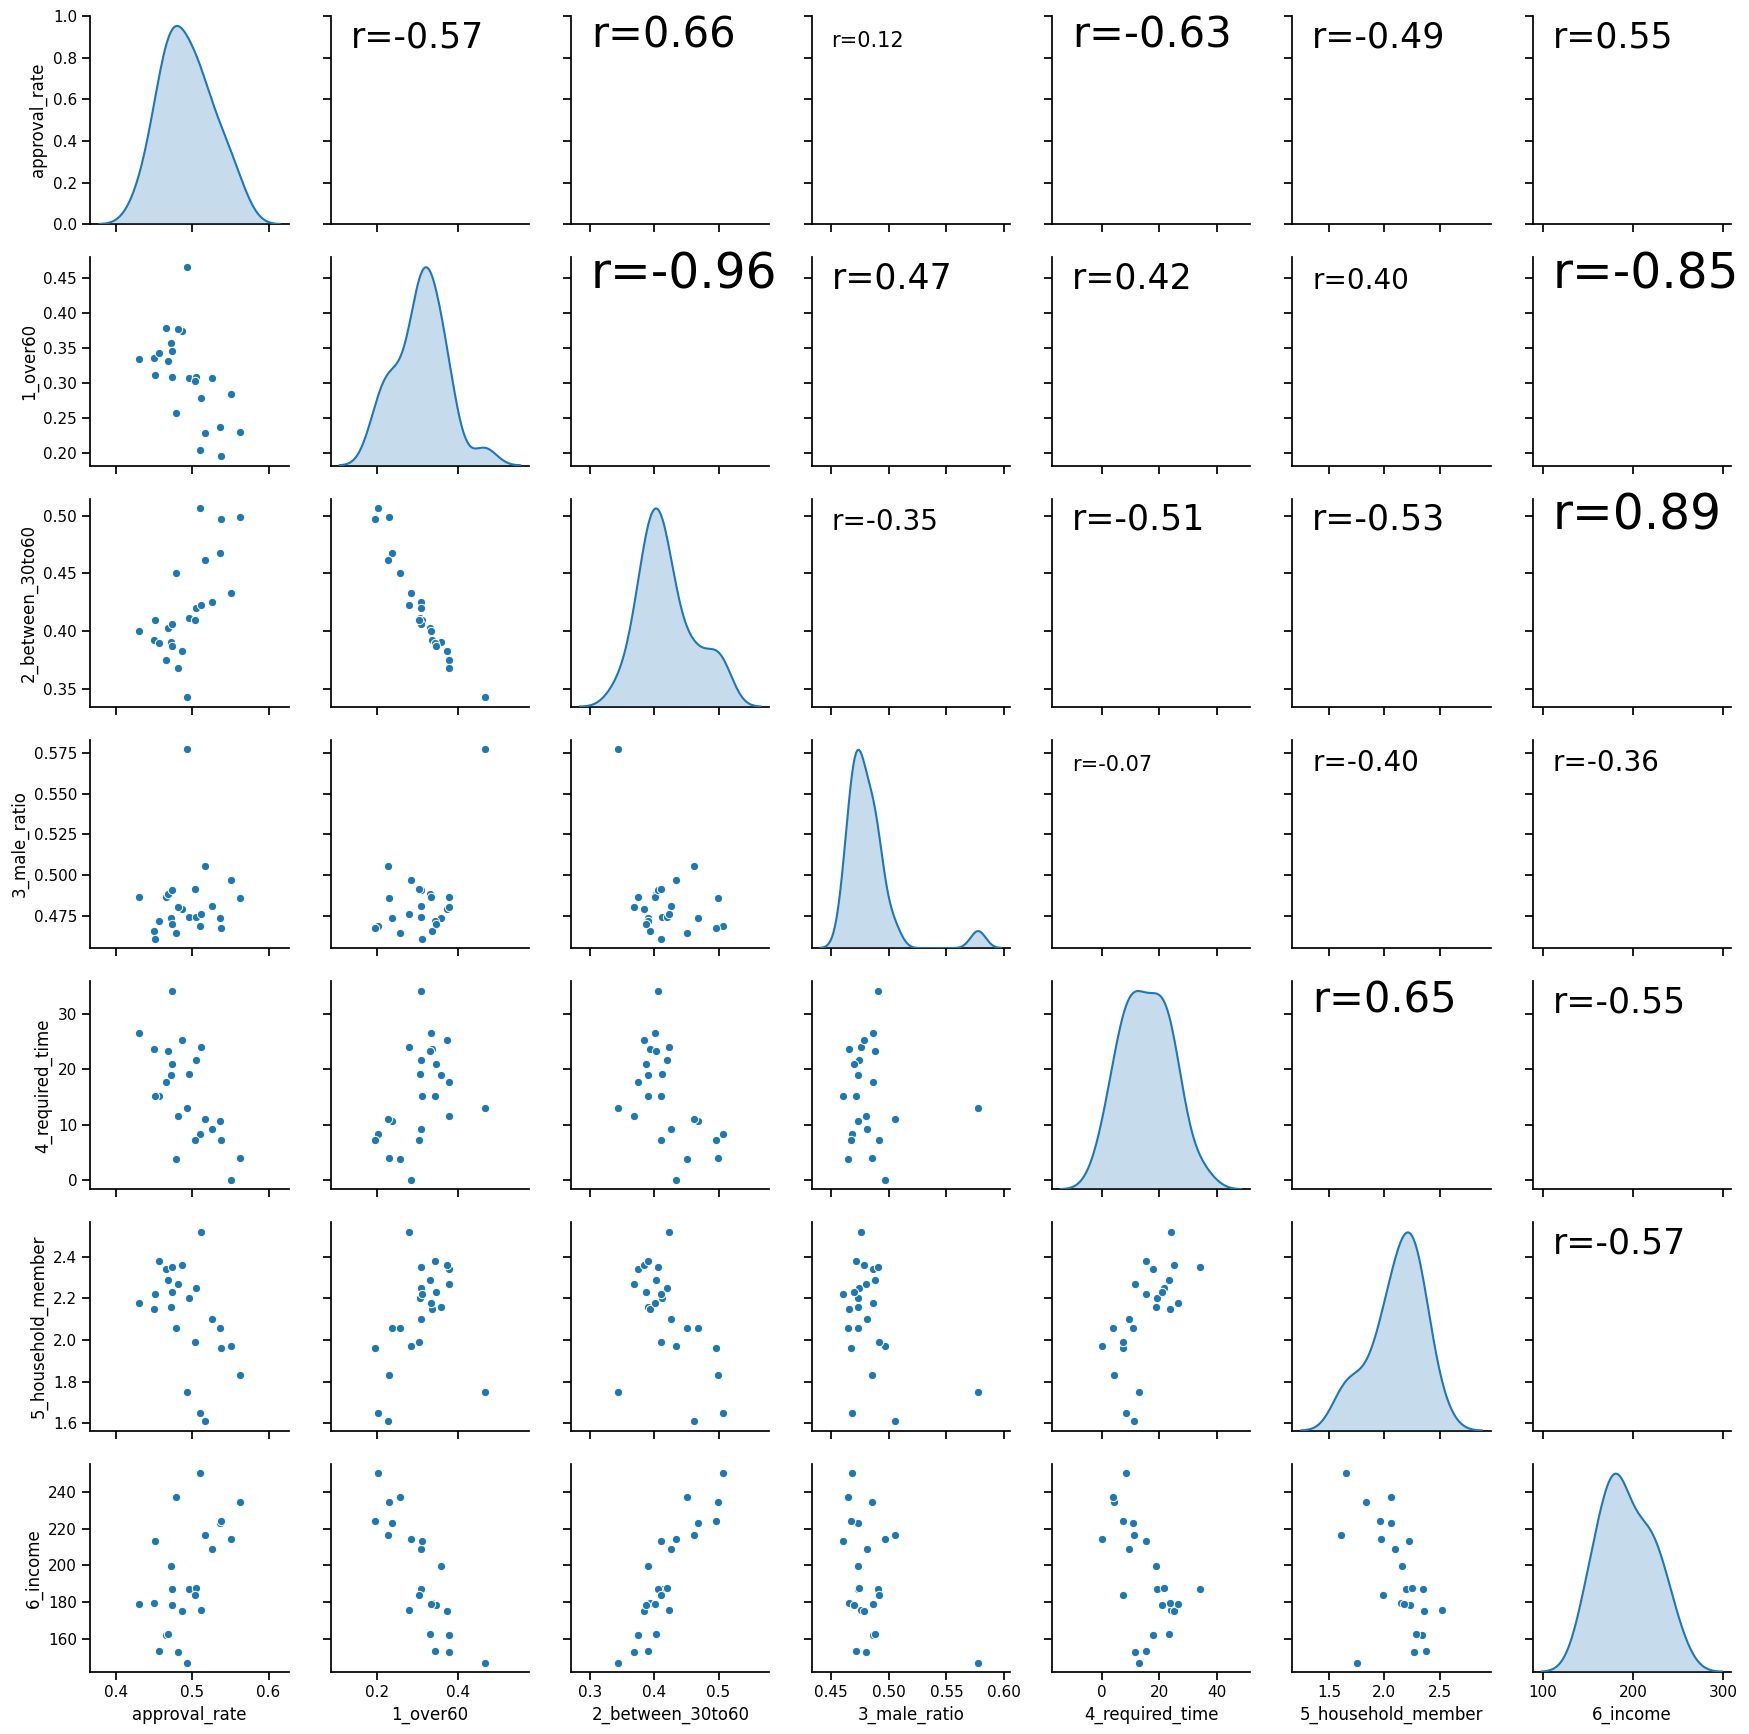

In [5]:
# %%1. pair_analyzerでデータの可視化
use_cols = [OBJECTIVE_VARIALBLE] + EXPLANATORY_VALIABLES
gp = CustomPairPlot()
gp.pairanalyzer(df[use_cols])

##4-1) Visualization of all data

##4-2) Feature selection (exclusion of highly correlated features)
The criteria for multicollinearity are often VIF=10 (equivalent to R=0.95) or 5 (equivalent to R=0.9), but
This time, we will look at it strictly and exclude explanatory variables with a correlation coefficient of 0.9 or more.
Specifically,

・ '1. Proportion over 60' is excluded‥ '2. Ratio of 30-50s' has a correlation coefficient of -0.96, and the correlation with the approval rate is lower than 2.

・ '6. Average income per person is excluded' Although the correlation coefficient with '2. Ratio of 30-50s' is slightly below the standard at 0.89, we exclude it because we can specify a clear causal relationship that 'the more people in their prime working years, the higher the income'.

Therefore, we will use the following four features for future analysis.

Feature 2 'Proportion of 30-50s' (considering the reversal phenomenon of people in their 20s)

Feature 3 'Male Ratio'

Feature 4 'Time required from the station where the main government building is located to the old district center station'

Feature 5 'Average Household Size'



<Figure size 640x480 with 0 Axes>

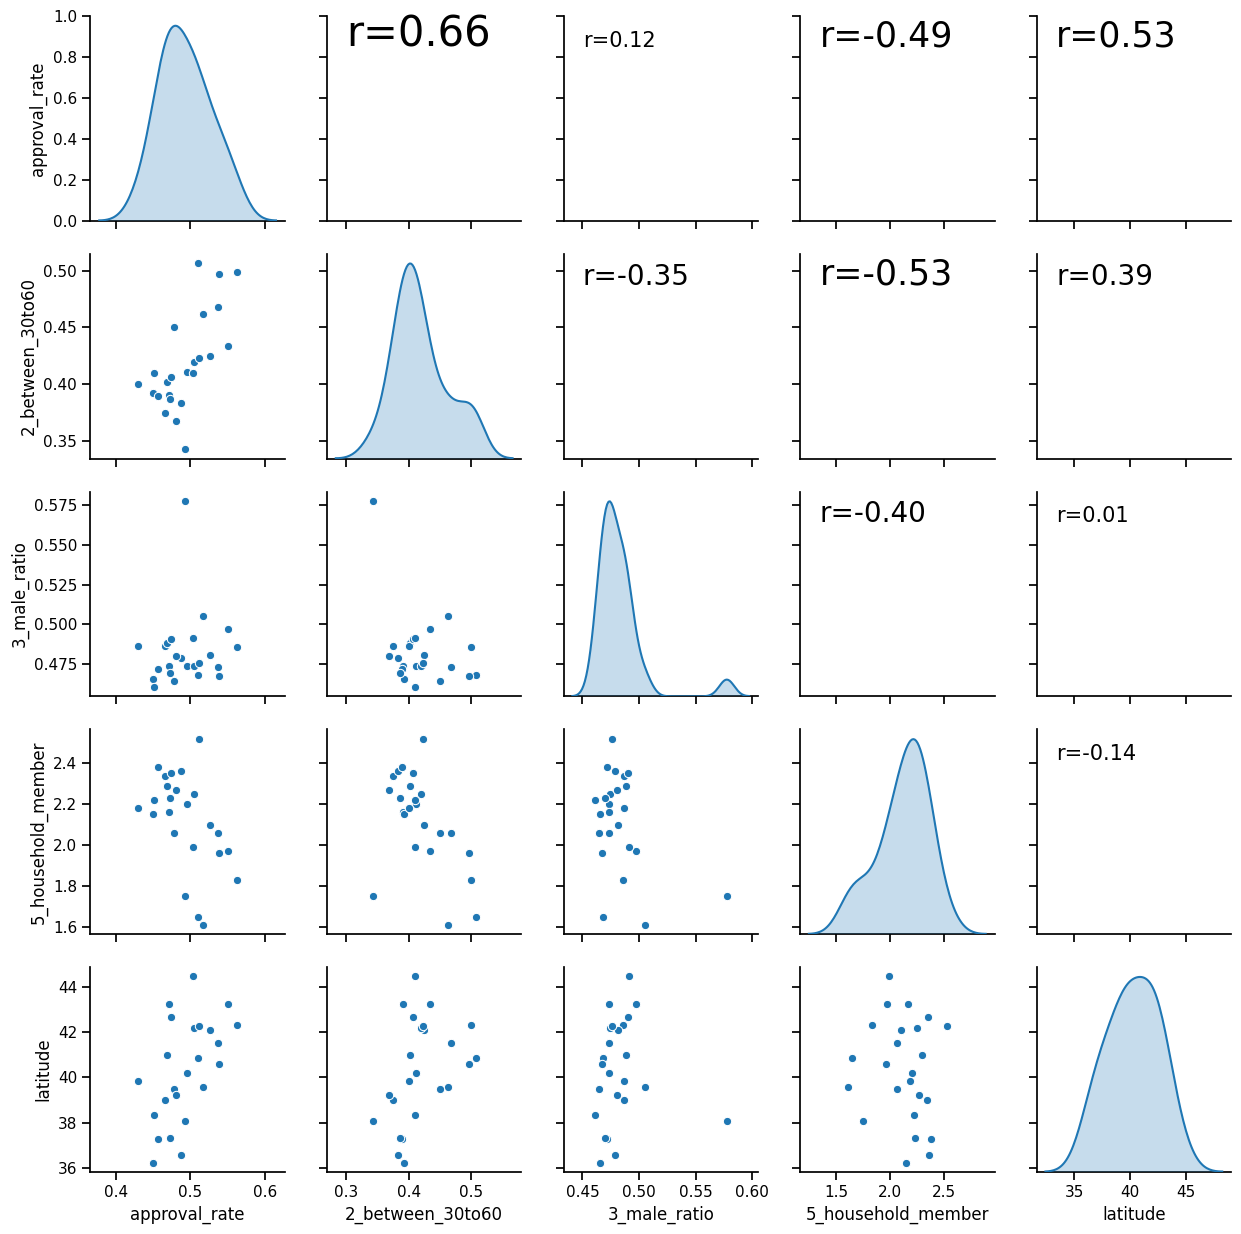

In [6]:
# %%1. pair_analyzerでデータの可視化(特徴量削減後)
use_cols = [OBJECTIVE_VARIALBLE] + USE_EXPLANATORY
gp.pairanalyzer(df[use_cols])

##4-3) Creation of Regression Model


In [ ]:
import xgboost as xgb
from sklearn import metrics as met
import sklearn as skl
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns

#使用するフィールド
KEY_VALUE = 'ward_before'#キー列
OBJECTIVE_VARIALBLE = 'approval_rate'#目的変数
USE_EXPLANATORY = ['2_between_30to60','3_male_ratio','4_required_time','5_household_member']#使用する説明変数
#データ読込
df = pd.read_csv(f'./osaka_metropolis_english.csv')

#目的変数と説明変数を取得（pandasではなくndarrayに変換）
y = df[[OBJECTIVE_VARIALBLE]].values
X = df[USE_EXPLANATORY].values
#グリッドサーチと性能評価の共通パラメータ
num_round=10000#最大学習回数
early_stopping_rounds=50#評価指標がこの回数連続で改善しなくなった時点で学習をストップ
seed = 42#乱数シード

#グリッドサーチ用パラメータ
cv_params = {'eval_metric':['rmse'],#データの評価指標
             'objective':['reg:squarederror'],#最小化させるべき損失関数
             'random_state':[seed],#乱数シード
             'booster': ['gbtree'],
             'learning_rate':[0.1,0.3,0.5],
             'min_child_weight':[1,5,15],
             'max_depth':[3,5,7],
             'colsample_bytree':[0.5,0.8,1.0],
             'subsample':[0.5,0.8,1.0]
            }

#XGBoostのインスタンス作成
cv_model = xgb.XGBRegressor()
#グリッドサーチのインスタンス作成
# n_jobs=-1にするとCPU100%で全コア並列計算。とても速い。
cv = GridSearchCV(cv_model, cv_params, cv = 5, scoring= 'r2', n_jobs =-1)

#グリッドサーチ実行
evallist = [(X, y)]
cv.fit(X,
        y,
        eval_set=evallist,
        early_stopping_rounds=early_stopping_rounds
        )

#最適パラメータの表示
print('最適パラメータ ' + str(cv.best_params_))
print('変数重要度' + str(cv.best_estimator_.feature_importances_))

In [ ]:
# #ランダムサーチによるパラメータ最適化メソッド
# def random_search(X, y):
#     #パラメータ最適化クラス
#     xgb_tuning = xgb.XGBRegressor(X, y, USE_EXPLANATORY, y_colname=OBJECTIVE_VARIALBLE)
#     #ランダムサーチ実行
#     best_params, best_score, feature_importances, tuning_time = xgb_tuning.random_search_tuning(seed=SEED)
#     tuning_params = xgb_tuning.tuning_params#ランダムサーチに使用したパラメータ
#     return best_params, tuning_params, feature_importances, tuning_time

# #ベイズ最適化によるパラメータ最適化メソッド
# def bayes_optimization(X, y):
#     #パラメータ最適化クラス
#     xgb_tuning =xgb.XGBRegressor(X, y, USE_EXPLANATORY, y_colname=OBJECTIVE_VARIALBLE)
#     #ベイズ最適化実行
#     best_params, best_score, feature_importances, tuning_time = xgb_tuning.bayes_opt_tuning(seed=SEED)
#     tuning_params = xgb_tuning.tuning_params  # ベイズ最適化に使用したパラメータ
#     return best_params, tuning_params, feature_importances, tuning_time

# #%%2. パラメータ最適化
# if PARAM_TUNING_METHOD == 'Grid':
#     best_params, tuning_params, feature_importances, tuning_time = grid_search(X, y)
# elif PARAM_TUNING_METHOD == 'Random':
#     best_params, tuning_params, feature_importances, tuning_time = random_search(X, y)
# elif PARAM_TUNING_METHOD == 'Bayes':
#     best_params, tuning_params, feature_importances, tuning_time = bayes_optimization(X, y)

#%%3. 性能評価(Leave-One-Out)
#性能評価のパラメータ
num_round=10000#最大学習回数
early_stopping_rounds=50#評価指標がこの回数連続で改善しなくなった時点で学習をストップ
seed = SEED#学習用乱数シード

#結果保持用のDataFrame
df_result = pd.DataFrame(columns=['test_index','eval_rmse_min','train_rmse_min','num_train'])

#Leave-One-Outでデータ分割して性能評価
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):#全データに対して分割ループ
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtrain = xgb.DMatrix(X_train, label=y_train)#学習用データ
    dtest = xgb.DMatrix(X_test, label=y_test)#テストデータ
    evals = [(dtest, 'eval'),(dtrain, 'train')]#結果表示用の学習データとテストデータを指定
    evals_result = {}#結果保持用

    #学習実行
    model = xgb.train(cv.best_params_,
                    dtrain,#訓練データ
                    num_boost_round=num_round,
                    early_stopping_rounds=early_stopping_rounds,
                    evals=evals,
                    evals_result=evals_result
                    )
    
    #モデルの性能評価
    test_pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    num_train = len(evals_result['eval']['rmse'])
    df_result = df_result.append({'test_index': test_index[0],
                    'key_value': df[[KEY_VALUE]].iloc[test_index[0],0],
                    'pred_value': test_pred[0],
                    'real_value': df[[OBJECTIVE_VARIALBLE]].iloc[test_index[0],0],
                    'eval_rmse_min': evals_result['eval']['rmse'][num_train - 1],
                    'train_rmse_min': evals_result['train']['rmse'][num_train - 1],
                    'num_train': num_train},
                    ignore_index=True)

In [12]:
#性能評価結果の表示
print('RMSE平均' + str(df_result['eval_rmse_min'].mean()))
print('相関係数' + str(df_result[['pred_value','real_value']].corr().iloc[1,0]))
print('予測誤差の最大値' + str(max((df_result['pred_value'] - df_result['real_value']).abs())))
 

RMSE平均0.021372292085849374
相関係数0.6531611502029804
予測誤差の最大値0.05394510969076538


In [9]:
#結果を出力
dt_now = datetime.now().strftime('%Y%m%d%H%M%S')
feat_use = 'feat' + '-'.join([ex.split('_')[0] for ex in USE_EXPLANATORY])
#評価結果
df_result.to_csv(f"{os.getenv('HOMEDRIVE')}{os.getenv('HOMEPATH')}\Desktop\{feat_use}_{dt_now}_result.csv", index=False)

path = f"{os.getenv('HOMEDRIVE')}{os.getenv('HOMEPATH')}\Desktop\{feat_use}_{dt_now}_result.txt"
with open(path, mode='w') as f:
        f.write('特徴量' + str(USE_EXPLANATORY))
        f.write('\n最適化手法' + PARAM_TUNING_METHOD)
        f.write('\n最適パラメータ' + str(cv.best_estimator_))
        f.write('\n変数重要度' + str(cv.best_estimator_.feature_importances_))
        f.write('\nRMSE平均' + str(df_result['eval_rmse_min'].mean()))
        f.write('\n相関係数' + str(df_result[['pred_value','real_value']].corr().iloc[1,0]))
        f.write('\n予測誤差の最大値' + str(max((df_result['pred_value'] - df_result['real_value']).abs())))



##4-4) Performance Evaluation
Average RMSE: The size of the overall prediction error (smaller is better)

Correlation coefficient between prediction and reality: The size of the correlation between prediction and reality (larger is better)

Maximum prediction error: Evaluation of whether there are districts with extremely large prediction errors (smaller is better)

Average RMSE (smaller is better): 0.0226
Correlation coefficient between prediction and reality (larger is better): 0.619

Maximum prediction error (smaller is better): 0.0709


<Axes: xlabel='pred_value', ylabel='real_value'>

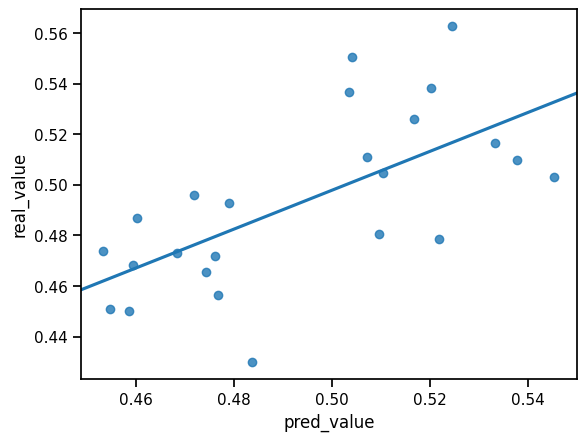

In [10]:
#散布図表示
sns.regplot(x="pred_value", y="real_value", data=df_result, ci=0)


#Discussion and Summary
In order of importance

Feature 2 'Proportion of 30-50s'

Feature 5 'Average Household Size'

Feature 3 'Male Ratio'

There is more approval in 'districts with a high proportion of working-age males, fewer average household sizes, and located in the north', and

There is more opposition in 'districts with a low proportion of working-age males, many families, and located in the south'

Judging from the feature importance, the influence of age composition is the largest and the influence of male ratio is the smallest)

As can be seen from the correlation analysis, the relatively large opposition in their 20s (the reversal phenomenon with their 30s) is also likely to affect the difference in approval rate by district.